Отчет по КТ2 по дисциплине «Математические пакеты прикладных программ».

Выполнила: Темченко Диана Тарасовна, Э-2109.
    
Нам дан исходный датасет для анализа: vehicleM.dat.


In [404]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [382]:
df = pd.read_csv('vehicleM.dat', sep = ',',header=None)
df.columns = ['Compactness', 'Circularity','Distance_circularity', 'Radius_ratio', 'Praxis_aspect_ratio', 'Max_length_aspect_ratio', 'Scatter_ratio', 'Elongatedness', 'Praxis_rectangular', 'Length_rectangular', 'Major_variance', 'Minor_variance', 'Gyration_radius', 'Major_skewness', 'Minor_skewness', 'Minor_kurtosis', 'Major_kurtosis', 'Hollows_ratio', 'Class'] 
df

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
3,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
4,107.0,57.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,90.0,44.0,72.0,157.0,64.0,8.0,137.0,48.0,18.0,144.0,159.0,283.0,171.0,65.0,9.0,4.0,196.0,203.0,van
672,93.0,34.0,66.0,140.0,56.0,7.0,130.0,51.0,18.0,120.0,151.0,251.0,114.0,62.0,5.0,29.0,201.0,207.0,opel
673,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,saab
674,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,van


ПРЕДОБРАБОТКА ДАННЫХ:

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Compactness              676 non-null    float64
 1   Circularity              676 non-null    float64
 2   Distance_circularity     676 non-null    float64
 3   Radius_ratio             676 non-null    float64
 4   Praxis_aspect_ratio      676 non-null    float64
 5   Max_length_aspect_ratio  676 non-null    float64
 6   Scatter_ratio            676 non-null    float64
 7   Elongatedness            676 non-null    float64
 8   Praxis_rectangular       676 non-null    float64
 9   Length_rectangular       676 non-null    float64
 10  Major_variance           676 non-null    float64
 11  Minor_variance           676 non-null    float64
 12  Gyration_radius          676 non-null    float64
 13  Major_skewness           676 non-null    float64
 14  Minor_skewness           6

Наличие дубликатов:

In [384]:
df.duplicated().sum()

0

Наличие пропусков:

In [385]:
df.isna().sum()

Compactness                0
Circularity                0
Distance_circularity       0
Radius_ratio               0
Praxis_aspect_ratio        0
Max_length_aspect_ratio    0
Scatter_ratio              0
Elongatedness              0
Praxis_rectangular         0
Length_rectangular         0
Major_variance             0
Minor_variance             0
Gyration_radius            0
Major_skewness             0
Minor_skewness             0
Minor_kurtosis             0
Major_kurtosis             0
Hollows_ratio              0
Class                      0
dtype: int64

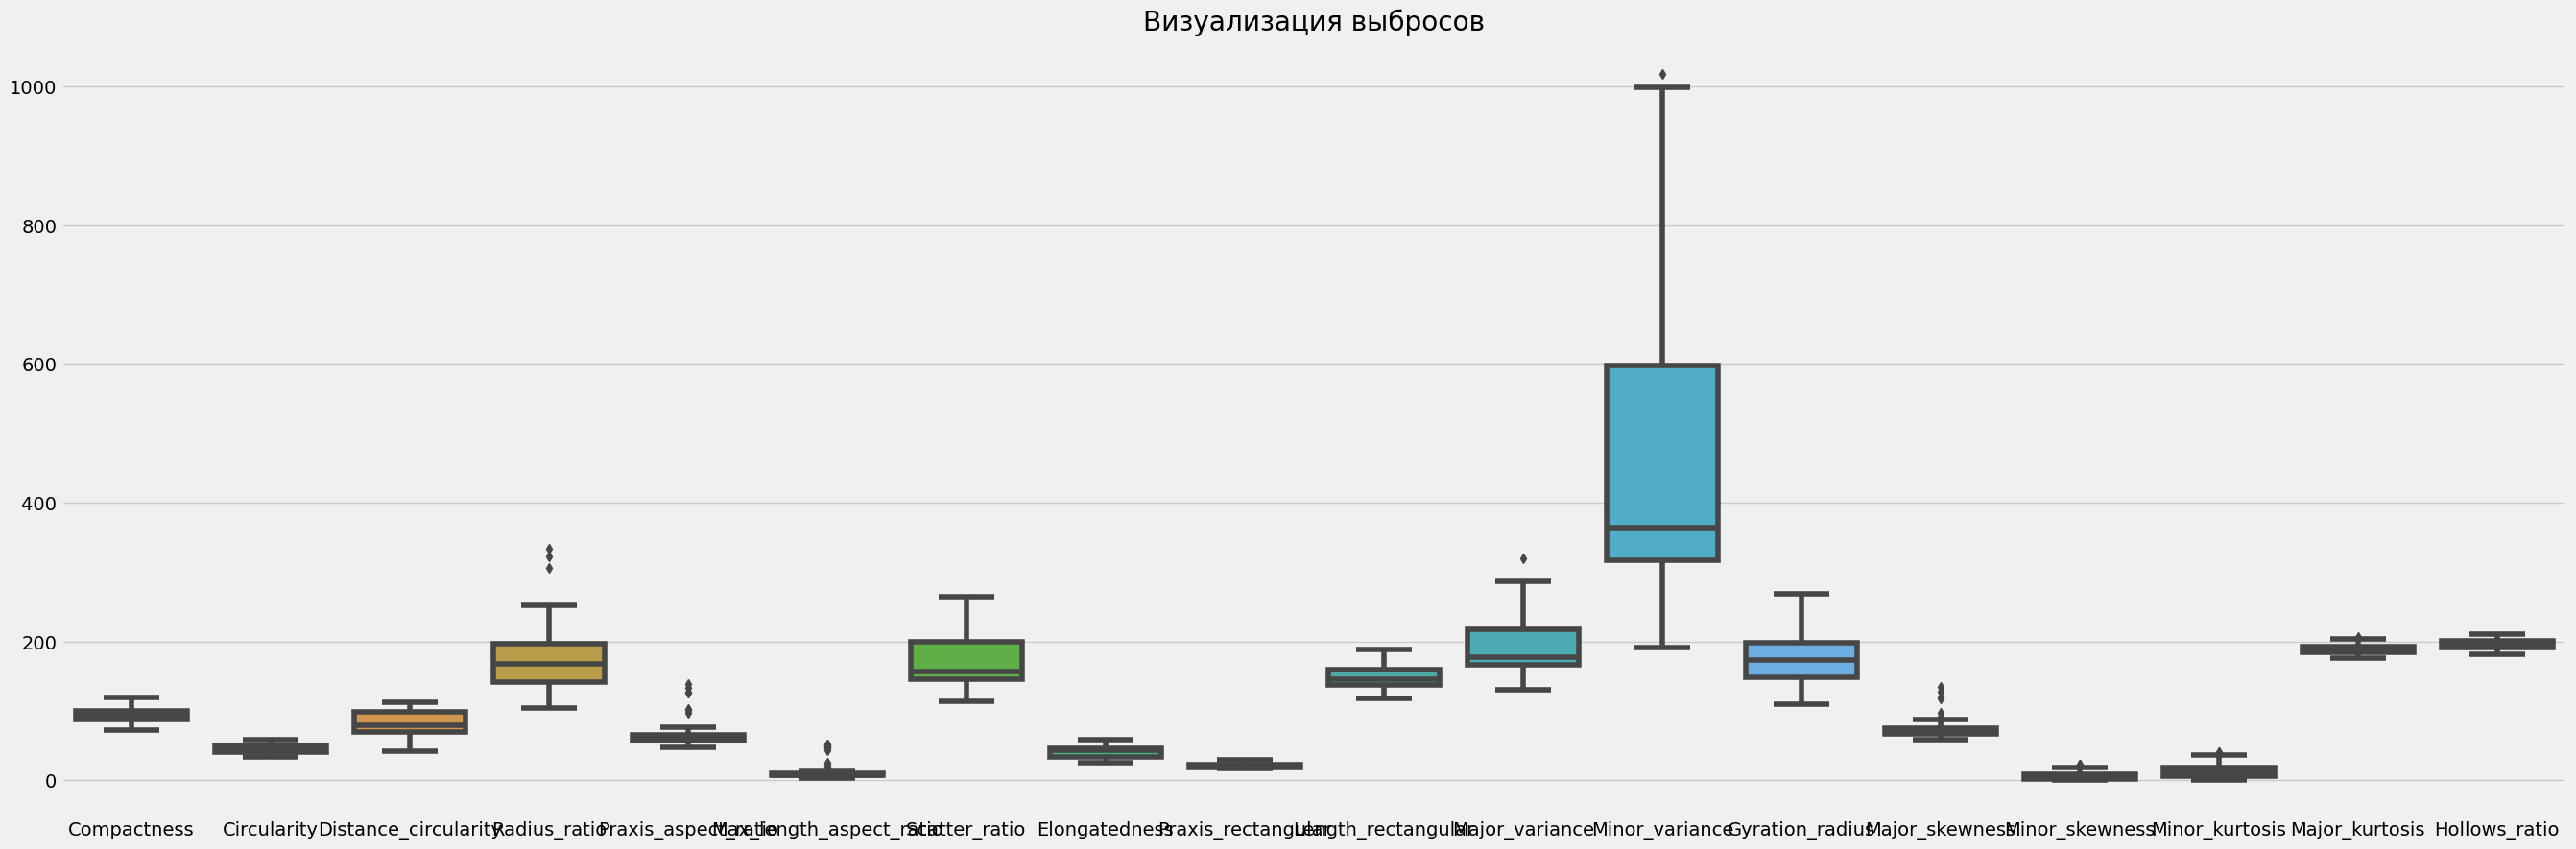

In [386]:
plt.figure(figsize=(30,10))
plt.title("Визуализация выбросов")
sns.boxplot(data=df);

Как видно, выбросы есть в некоторых столбцах. Избавимся от них:

In [387]:
def v(df, columns):
    mu = df[columns].mean()
    sigma = df[columns].std()
    ej_h = mu + 3 * sigma
    ej_l = mu - 3 * sigma
    df_num_1 = df_num[~((df[columns] < ej_l) | (df[columns] > ej_h)).any(axis=1)]
    return df_num_1


columns = list(df.columns)
df = v(df, columns)

C:\Users\Админ\AppData\Local\Temp\ipykernel_15008\1948465800.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu = df[columns].mean()
C:\Users\Админ\AppData\Local\Temp\ipykernel_15008\1948465800.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sigma = df[columns].std()
C:\Users\Админ\AppData\Local\Temp\ipykernel_15008\1948465800.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_num_1 = df_num[~((df[columns] < ej_l) | (df[columns] > ej_h)).any(axis=1)]
C:\Users\Админ\AppDa

In [388]:
df_num = df.iloc[:,:18]  # отбор числовых данных для кластерного анализа
df_num.head(3)

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0


Так, мы избавились от 20 выбросов.

In [389]:
#загружаем значения в переменную
X = df_num.values
X

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [ 93.,  41.,  82., ...,  10., 199., 207.],
       ...,
       [ 93.,  39.,  87., ...,  25., 188., 195.],
       [ 89.,  46.,  84., ...,  20., 186., 197.],
       [106.,  54., 101., ...,   4., 187., 201.]])

In [390]:
#нормализуем данные
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.69855742e-01,  5.24013032e-01,  6.36200562e-02, ...,
         3.89740006e-01, -3.31186713e-01,  1.52767037e-01],
       [-3.16717912e-01, -6.12090765e-01,  1.26758872e-01, ...,
         1.63783803e-01, -1.02731477e-02,  4.22162672e-01],
       [-7.34310849e-02, -6.12090765e-01,  4.81240970e-04, ...,
        -2.88128604e-01,  1.59429468e+00,  1.49974521e+00],
       ...,
       [-7.34310849e-02, -9.36691850e-01,  3.16175317e-01, ...,
         1.40654292e+00, -1.70729930e-01, -1.16628598e-01],
       [-5.60004738e-01,  1.99411947e-01,  1.26758872e-01, ...,
         8.41652413e-01, -4.91643496e-01,  1.52767037e-01],
       [ 1.50793329e+00,  1.49781629e+00,  1.20011873e+00, ...,
        -9.65997214e-01, -3.31186713e-01,  6.91558307e-01]])

В итоге результатами кластеризации k-means (выбран именно данный способ кластеризации, так как для дальнейшего анализа нужны центроиды) стали:

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


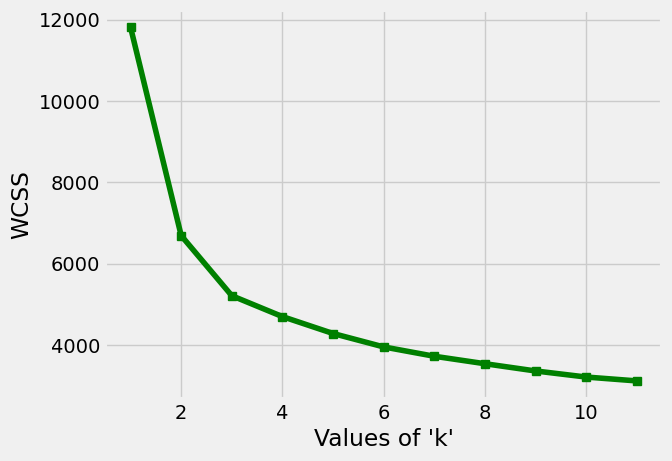

In [391]:
#строим график для определения числа кластеров
wcss = {} 
for i in range(1, 12): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

Как видно по графику, оптимальное число кластеров = 2.

In [392]:
kmeans = KMeans(n_clusters=2, random_state=30)
labels = kmeans.fit_predict(X)
labels

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,


В Индекс Дэвиса –Булдина (DBI), представленный Дэвидом Л. Дэвисом и Дональдом У. Булдином в 1979 году, представляет собой показатель для оценки алгоритмов кластеризации. Это схема внутренней оценки, при которой проверка того, насколько хорошо была выполнена кластеризация, производится с использованием величин и характеристик, присущих набору данных.

Это, возможно, одна из самых используемых мер оценки качества кластеризации.

Индекс Дэвиcа-Болдуина должен минимизироваться для роста кластеризации.
Этот индекс означает среднее «сходство» между кластерами, где сходство — это мера, которая сравнивает расстояние между кластерами с размером самих кластеров.

Ноль — это наименьший возможный результат. Значения, близкие к нулю, указывают на лучшее разделение.

При обычном использовании индекс Дэвиса-Болдина применяется к результатам кластерного анализа следующим образом.

Индекс определяется как среднее сходство между каждым кластером. C_i для i=1,…,k и его самый похожий C_j . В контексте этого индекса сходство определяется как мера R_ij что трактуется:

	s_i, среднее расстояние между каждой точкой кластера i и центроид этого кластера — также известный как диаметр кластера.
    
	d_ij, расстояние между центрами скоплений i, а также j.
    
Простой выбор для построения R_ij так что он неотрицателен и симметричен:


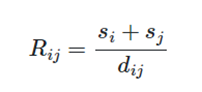

Тогда индекс Дэвиса-Болдина определяется как:

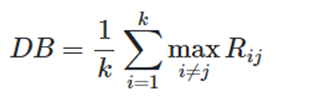

Преимущества:

•	Вычисление Дэвиса-Боулдина проще, чем оценка Силуэта.

•	В индексе вычисляются только количества и характеристики, присущие набору данных.

Недостатки:

•	Индекс Дэвиса-Боулдинга обычно выше для выпуклых кластеров, чем для других концепций кластеров, таких как кластеры на основе плотности, подобные тем, которые получены из DBSCAN.

•	Использование центроидного расстояния ограничивает метрику расстояния евклидовым пространством.


In [393]:
df['cluster'] = labels
df

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,cluster
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,1
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,1
2,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,1
4,107.0,57.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,0
5,97.0,43.0,73.0,173.0,65.0,6.0,153.0,42.0,19.0,143.0,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,90.0,44.0,72.0,157.0,64.0,8.0,137.0,48.0,18.0,144.0,159.0,283.0,171.0,65.0,9.0,4.0,196.0,203.0,1
672,93.0,34.0,66.0,140.0,56.0,7.0,130.0,51.0,18.0,120.0,151.0,251.0,114.0,62.0,5.0,29.0,201.0,207.0,1
673,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,1
674,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,1


In [394]:
#расчет индекса через встроенную функцию
db_index = davies_bouldin_score(X, labels)
print(db_index)

1.0335982155978725


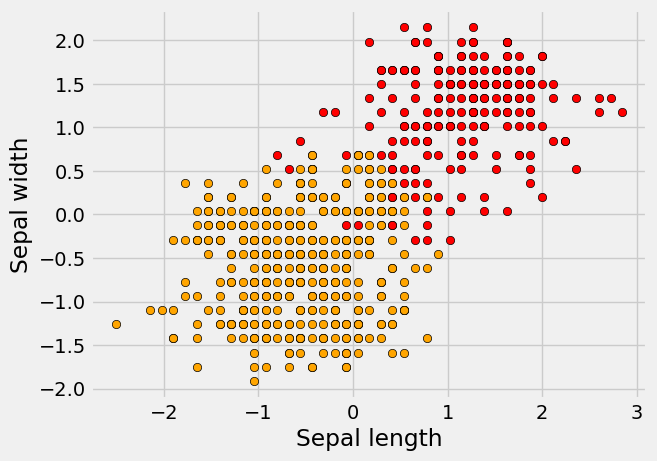

In [395]:
#визуализация распределения на кластеры
unique_labels = list(set(labels))
colors = ['red', 'orange', 'grey','blue']

for i in unique_labels:
    filtered_label = X[labels == i]
    plt.scatter(filtered_label[:,0],
                filtered_label[:,1],
                color = colors[i],
                edgecolor='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [396]:
#построение графика для сравнения оценки индекса Дэвиса-Боулдинга для разного числа кластеров
results = {}

for i in range(2,12):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results.update({i: db_index})

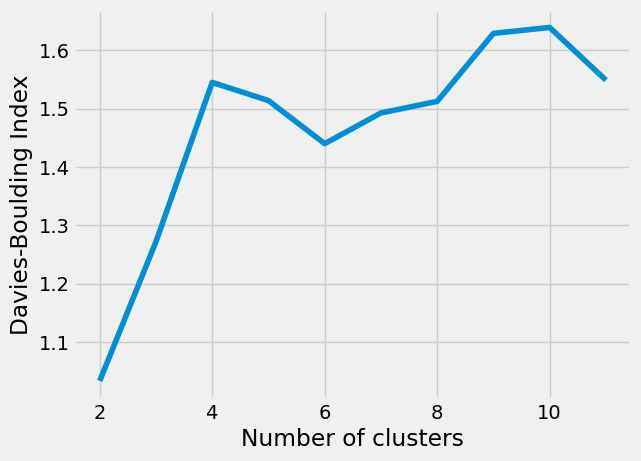

In [397]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

Как видно по рисунку, самым лучшим вариантом является именно 2 кластрера. Так как индекс Дэвиса-Боулдинга в данном случае принимает наименьшее значение.

Для сравнения, провела оценку с помощью silhouette_coefficients, чтобы сравнить результаты.

In [398]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=30)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_coefficients.append(score)

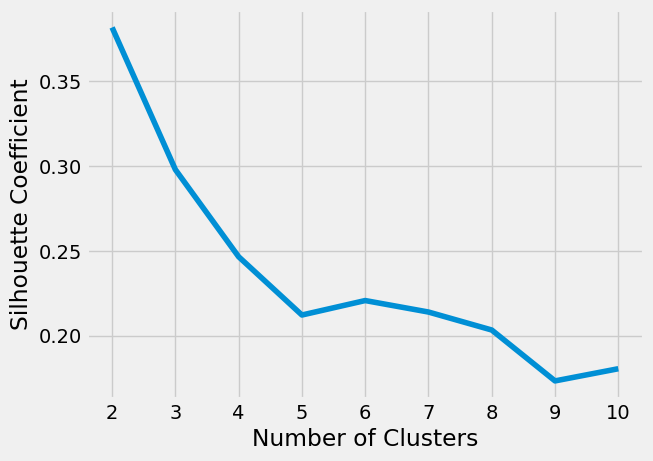

In [399]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

В итоге 2 кластера также оптимальный вариант, так как значение наибольшее.

РЕАЛИЗАЦИЯ ФУНКЦИИ ПОЛЬЗОВАТЕЛЯ

In [400]:
import numpy as np

def davis_bouldin(X, labels):
    # Получаем уникальные метки и их количество
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

  # Вычисляем центроиды кластеров
    centroids = [np.mean(X[labels == label], axis=0) 
for label in unique_labels]
    DB_index = 0.0

  # Перебираем все пары кластеров
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            dist_i = np.linalg.norm(X[labels == unique_labels[i]] - centroids[i], axis=1)
            dist_j = np.linalg.norm(X[labels == unique_labels[j]] - centroids[j], axis=1)

      # Вычисляем максимальное расстояние до центроида
            max_dist_i = np.max(dist_i)
            max_dist_j = np.max(dist_j)

      # Вычисляем расстояние между центроидами
            inter_centroid_dist = np.linalg.norm(centroids[i] - centroids[j])

      # Вычисляем индекс Дэвиса-Болдина для пары кластеров
            DB_index += (max_dist_i + max_dist_j) / inter_centroid_dist

  # Вычисляем средний индекс Дэвиса-Болдина по всем парам кластеров
        DB_index /= n_clusters * (n_clusters - 1) / 2

        return DB_index
davis_bouldin(X, labels)

0.3410244993175858

Оценка вышла отличная от расчетной по встроенной функции, но методом подстановки разного числа кластеров суть такая же. Если увеличивать число кластеров, оценка растет. А оптимальное число кластеров соответсвует наименьшему значению индекса.

По пользовательской фукнции значение индекса выходит гораздо лучше, так как оно близко к 0.

В встроенной функции значение около 1, это очень высокое. Можно предположить, что результаты кластеризации неудачны.

ОПИСАНИЕ КЛАСТЕРОВ:

In [401]:
df[df['cluster'] == 0].describe()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,cluster
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.0
mean,102.394737,51.535088,100.153509,201.390351,62.846491,9.574561,208.407895,31.956140,23.675439,162.618421,222.842105,649.837719,206.346491,71.065789,7.026316,14.460526,189.557018,197.671053,0.0
std,5.456465,3.676763,7.078424,16.368857,5.369857,2.023793,17.029007,2.414677,1.463179,9.828441,16.145582,100.720685,23.416138,4.993394,5.334553,9.740384,3.786283,5.436996,0.0
min,87.000000,42.000000,76.000000,161.000000,47.000000,4.000000,171.000000,26.000000,21.000000,138.000000,186.000000,440.000000,139.000000,59.000000,0.000000,0.000000,179.000000,182.000000,0.0
25%,99.000000,49.000000,96.000000,191.750000,60.000000,9.000000,197.000000,30.750000,23.000000,156.000000,214.000000,578.750000,194.000000,68.000000,2.750000,6.000000,187.000000,196.000000,0.0
50%,103.000000,52.000000,101.000000,202.000000,63.000000,10.000000,211.000000,31.000000,24.000000,163.000000,222.000000,663.000000,211.000000,71.000000,6.000000,12.500000,189.000000,198.000000,0.0
75%,107.000000,54.000000,105.000000,212.000000,66.250000,11.000000,219.000000,33.000000,25.000000,170.250000,228.000000,707.000000,219.000000,73.000000,11.000000,22.000000,192.000000,201.000000,0.0
max,117.000000,58.000000,112.000000,238.000000,74.000000,13.000000,257.000000,38.000000,28.000000,188.000000,280.000000,957.000000,268.000000,88.000000,21.000000,39.000000,201.000000,211.000000,0.0


In [402]:
df[df['cluster'] == 1].describe()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,cluster
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.0
mean,88.920561,41.168224,72.317757,150.121495,60.464953,7.434579,147.070093,45.845794,18.878505,139.920561,168.341121,324.366822,156.637850,72.376168,5.969626,11.532710,188.801402,194.904206,1.0
std,4.974713,3.700714,9.423771,22.560441,5.493977,1.846047,14.234231,4.863914,0.969901,9.592310,14.824358,63.669327,21.502838,6.905592,4.554280,8.181567,7.200722,8.142046,0.0
min,73.000000,33.000000,42.000000,104.000000,48.000000,3.000000,114.000000,36.000000,17.000000,118.000000,131.000000,191.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000,1.0
25%,85.000000,38.000000,66.000000,133.000000,56.000000,6.000000,137.000000,43.000000,18.000000,132.000000,161.000000,279.750000,139.750000,67.000000,2.000000,5.000000,183.000000,187.000000,1.0
50%,89.000000,41.000000,72.000000,149.000000,60.000000,7.000000,149.000000,45.000000,19.000000,141.000000,170.000000,327.500000,158.000000,71.500000,5.000000,10.000000,188.000000,195.000000,1.0
75%,93.000000,44.000000,78.000000,166.000000,64.000000,8.000000,155.250000,49.000000,19.000000,146.000000,176.000000,360.250000,174.000000,77.000000,8.000000,16.000000,195.000000,201.000000,1.0
max,101.000000,49.000000,100.000000,209.000000,76.000000,22.000000,183.000000,59.000000,21.000000,167.000000,209.000000,504.000000,203.000000,89.000000,21.000000,38.000000,204.000000,211.000000,1.0


Нулевой кластер вышел более многочисленный. В целом по всем показателям значения в 0 кластере выше, чем в 1. Особенно заметен разброс по показателям Minor_variance и Major_variance., для 0 кластера значения по данному критерию значительно выше, минимальное значение в кластере 0 соответсвует максимальному в кластере 1. Стоит предположить, что именно данный фактор оказал наибольшее влияние на результаты кластеризации.

In [403]:
# БОЛЕЕ НАГЛЯДНО. Расчет средних значений признаков для каждого кластера
df1 = df
cluster_means = df1.iloc[:,1:].groupby('cluster').mean()

# Используем оформление для таблицы данных, содержащей средние значения признаков для каждого кластера
(cluster_means
 .style
 .format("{:.1f}")
 .background_gradient(cmap='Blues', axis = 0)
)

,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio
cluster,,,,,,,,,,,,,,,,,
0,51.5,100.2,201.4,62.8,9.6,208.4,32.0,23.7,162.6,222.8,649.8,206.3,71.1,7.0,14.5,189.6,197.7
1,41.2,72.3,150.1,60.5,7.4,147.1,45.8,18.9,139.9,168.3,324.4,156.6,72.4,6.0,11.5,188.8,194.9
